In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## all my csv (the namefile starting with a number)
files = [i for i in os.listdir('listings/') if i[0].isdigit()]


## Initializing all csv files as a pandas dataframe
def setup(datalist):
    
    dfs = []
    for i in datalist:  
        try:
            dfs.append(pd.read_csv("listings/" + str(i)))
        except UnicodeDecodeError:
            print(i)
    
    return dfs     

dfs = setup(files)


## Creating a list of pandas datetimes from the filenames 
def timestamps(datalist):
    periods = []
    for i in datalist:
        y = i.split(".")[0].split("_")[1]
        m = i.split(".")[0].split("_")[0]
        d = 1
        date = str(y) + "-" + str(m) + "-" + str(d)
        date = pd.Timestamp(date)
        periods.append(date)
    return periods

periods = timestamps(files)


## Sorting dataframes by date
tmp = [(d,p) for d,p in sorted(zip(dfs,periods), key=lambda pair: pair[1])]

## I select csvs with the column "zone"
tmp = [(a,b) for a,b in tmp if "zone" in a]

periods = [b for a,b in tmp]
dfs = [a for a,b in tmp]
    
    
## then check out if everything went well 
assert(len(periods) == len(dfs))

In [3]:
## remove price outliers as usual

def remove_outliers(period):
    x = period['price'] * period['availability_365'] / 365
    period["price_pond"] = x
    y = period['price']
    return period[y.between(y.quantile(.0001), y.quantile(.97))]

dfs = [remove_outliers(i) for i in dfs]


## for a better readability

periods = [i.strftime('%Y/%m') for i in periods]

In [4]:
## make a column with macroarea value {"periferia", "centro"} 

def aggregate_zone(df):
    df["macroarea"] = 'periferia'
    df.loc[df['zone'].isin(['Marconi','Irnerio','Malpighi','Galvani']), 'macroarea'] = 'centro'
    return df

dfs = [aggregate_zone(i) for i in dfs]

/home/laszlo/my_venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/laszlo/my_venv/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
def prezzo_medio_per_zona(x1, x2, dfs=dfs):    
    
    y1 = dfs[x1].groupby("zone")['price'].mean()
    y2 = dfs[x2].groupby("zone")['price'].mean()

    s1 = ((y2 - y1) / y1 ) * 100
    s0 = s1.index

    for ix,it in enumerate(s0):
        print(f"tasso crescita prezzo medio fra {periods[x1]} e {periods[x2]} per quartiere {it} è del {s1[ix]:.2f} %")

    print()
    print(f"media {((y2.sum()- y1.sum()) / y1.sum() ) * 100}")

pace = 2
for i in range(len(periods))[:-pace]:
    prezzo_medio_per_zona(i, i+pace)
    print()
    print()

tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Barca è del 0.41 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Bolognina è del 4.32 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Borgo Panigale è del 5.84 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Colli è del -1.15 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Corticella è del 8.52 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Costa Saragozza è del 7.35 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Galvani è del 4.32 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Irnerio è del 7.16 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Lame è del -2.46 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Malpighi è del 6.42 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere Marconi è del 6.04 %
tasso crescita prezzo medio fra 2018/07 e 2019/01

In [6]:
def prezzo_medio_per_zona(x1, dfs=dfs):    
    
    y1 = dfs[x1].groupby("zone")['price'].mean()
    print(f"media prezzo nel periodo {periods[x1]} {y1}")


for i in range(len(periods)):
    prezzo_medio_per_zona(i)
    print()
    print()

media prezzo nel periodo 2018/07 zone
Barca              56.500000
Bolognina          58.336134
Borgo Panigale     48.823529
Colli              83.930233
Corticella         46.027027
Costa Saragozza    57.891720
Galvani            73.554286
Irnerio            71.510000
Lame               58.290323
Malpighi           70.473354
Marconi            74.200000
Mazzini            60.960000
Murri              57.566434
S. Ruffillo        57.156250
S. Viola           46.526316
S. Vitale          54.845588
Saffi              56.757143
San Donato         59.948187
Name: price, dtype: float64


media prezzo nel periodo 2018/08 zone
Barca              57.482759
Bolognina          58.609418
Borgo Panigale     48.246575
Colli              84.247059
Corticella         45.404762
Costa Saragozza    59.059211
Galvani            75.164804
Irnerio            72.735197
Lame               56.176471
Malpighi           70.439103
Marconi            74.568376
Mazzini            59.679487
Murri              57.48

media prezzo nel periodo 2021/04 zone
Barca              58.058824
Bolognina          72.283951
Borgo Panigale     64.514706
Colli              96.765957
Corticella         59.115385
Costa Saragozza    66.920530
Galvani            79.823204
Irnerio            83.770563
Lame               61.027027
Malpighi           77.821782
Marconi            85.971919
Mazzini            62.987500
Murri              64.090278
S. Ruffillo        67.133333
S. Viola           52.285714
S. Vitale          63.635338
Saffi              61.513661
San Donato         73.971831
Name: price, dtype: float64


media prezzo nel periodo 2021/06 zone
Barca               55.625000
Bolognina           71.294479
Borgo Panigale      64.417910
Colli              102.142857
Corticella          58.980392
Costa Saragozza     67.916084
Galvani             82.968208
Irnerio             84.799703
Lame                64.621622
Malpighi            81.323129
Marconi             88.200988
Mazzini             65.000000
Murri       

/home/laszlo/my_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


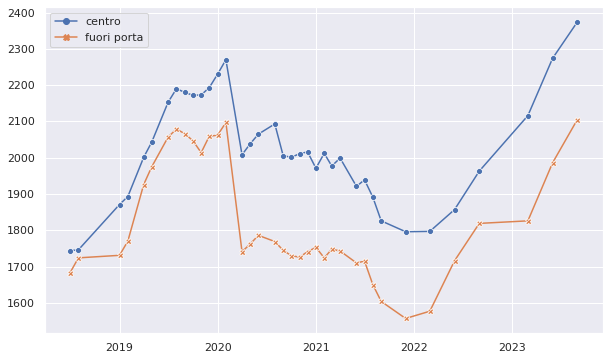

In [7]:
def snsplot(lines):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,6))
    sns.lineplot(markers=True, dashes=False, data=lines)


def ids_during_time(dfs, periods):
    index = pd.DatetimeIndex(periods)

    centro = pd.Series([dfs[i][dfs[i].macroarea.isin(["centro"])]\
                                    .id.count() for i in range(len(dfs))], index=index)
    #bolognina = pd.Series([dfs[i][dfs[i].macroarea.isin(["bolognina"])]\
    #                                .id.count() for i in range(len(dfs))], index=index)
    periferia = pd.Series([dfs[i][dfs[i].macroarea.isin(["periferia"])]\
                                    .id.count() for i in range(len(dfs))], index=index)
    

    lines = centro.rename("centro").to_frame()\
        .join(periferia.rename("fuori porta").to_frame())
            #.join(bolognina.rename("bolognina").to_frame())\
    snsplot(lines)
    
ids_during_time(dfs, periods)


#andamento annunci

In [8]:
def prezzo_medio_per_macroarea(x1, x2, dfs=dfs):
    
    y1 =dfs[x1].groupby("macroarea")['price'].mean()
    y2 = dfs[x2].groupby("macroarea")['price'].mean()

    s1 = ((y2 - y1) / y1 ) * 100
    s0 = s1.index

    for ix,it in enumerate(s0):
        print(f"tasso crescita prezzo medio fra {periods[x1]} e {periods[x2]} per quartiere {it} è del {s1[ix]:.2f} %")
        
        
pace = 2
for i in range(len(periods))[:-pace]:
    prezzo_medio_per_macroarea(i, i+pace)
    print()
    print()

tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere centro è del 6.16 %
tasso crescita prezzo medio fra 2018/07 e 2019/01 per quartiere periferia è del 4.15 %


tasso crescita prezzo medio fra 2018/08 e 2019/02 per quartiere centro è del 4.97 %
tasso crescita prezzo medio fra 2018/08 e 2019/02 per quartiere periferia è del 4.92 %


tasso crescita prezzo medio fra 2019/01 e 2019/04 per quartiere centro è del 1.83 %
tasso crescita prezzo medio fra 2019/01 e 2019/04 per quartiere periferia è del 2.30 %


tasso crescita prezzo medio fra 2019/02 e 2019/05 per quartiere centro è del 1.18 %
tasso crescita prezzo medio fra 2019/02 e 2019/05 per quartiere periferia è del 1.99 %


tasso crescita prezzo medio fra 2019/04 e 2019/07 per quartiere centro è del 0.05 %
tasso crescita prezzo medio fra 2019/04 e 2019/07 per quartiere periferia è del 0.34 %


tasso crescita prezzo medio fra 2019/05 e 2019/08 per quartiere centro è del 0.97 %
tasso crescita prezzo medio fra 2019/05 e 2019/08 p

In [9]:
def tasso_crescita_per_zona(x1, x2, dfs=dfs):   
    
    y1 =  dfs[x1]['zone'].value_counts(normalize=False)
    y2 = dfs[x2]['zone'].value_counts(normalize=False)

    s1 = ((y2 - y1) / y1 ) * 100
    s0 = s1.index

    for ix,it in enumerate(s0):
        print(f"tasso crescita num. annunci fra {periods[x1]} e {periods[x2]} per quartiere {it} è del {s1[ix]:.2f} %")
    
    print()
    print(f"media {((y2.sum() - y1.sum()) / y1.sum() ) * 100}")
    
pace = 2
for i in range(len(periods))[:-pace]:
    tasso_crescita_per_zona(i, i+pace)
    print()
    print()

tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Barca è del 7.14 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Bolognina è del 0.56 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Borgo Panigale è del 17.65 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Colli è del 0.00 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Corticella è del 8.11 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Costa Saragozza è del 0.00 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Galvani è del 8.57 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Irnerio è del 6.67 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Lame è del 32.26 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Malpighi è del 4.39 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere Marconi è del 9.05 %
tasso crescita num. annunci fra 2018/07 e 2019/01

In [10]:
def tasso_crescita_per_macroarea(x1, x2, dfs=dfs):   
    
    y1 = dfs[x1]['macroarea'].value_counts(normalize=False)
    y2 = dfs[x2]['macroarea'].value_counts(normalize=False)

    s1 = ((y2 - y1) / y1 ) * 100
    s0 = s1.index

    for ix,it in enumerate(s0):
        print(f"tasso crescita num. annunci fra {periods[x1]} e {periods[x2]} per quartiere {it} è del {s1[ix]:.2f} %")
    
    print()
    print(f"media {((y2.sum() - y1.sum()) / y1.sum() ) * 100}")
    
pace = 2
for i in range(len(periods))[:-pace]:
    tasso_crescita_per_macroarea(i, i+pace)
    print()
    print()

tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere centro è del 7.28 %
tasso crescita num. annunci fra 2018/07 e 2019/01 per quartiere periferia è del 2.85 %

media 5.1065071491100085


tasso crescita num. annunci fra 2018/08 e 2019/02 per quartiere centro è del 8.42 %
tasso crescita num. annunci fra 2018/08 e 2019/02 per quartiere periferia è del 2.67 %

media 5.561959654178674


tasso crescita num. annunci fra 2019/01 e 2019/04 per quartiere centro è del 6.95 %
tasso crescita num. annunci fra 2019/01 e 2019/04 per quartiere periferia è del 11.27 %

media 9.022765130483066


tasso crescita num. annunci fra 2019/02 e 2019/05 per quartiere centro è del 7.92 %
tasso crescita num. annunci fra 2019/02 e 2019/05 per quartiere periferia è del 11.58 %

media 9.691509691509692


tasso crescita num. annunci fra 2019/04 e 2019/07 per quartiere centro è del 7.60 %
tasso crescita num. annunci fra 2019/04 e 2019/07 per quartiere periferia è del 6.80 %

media 7.206518971224854


tasso c

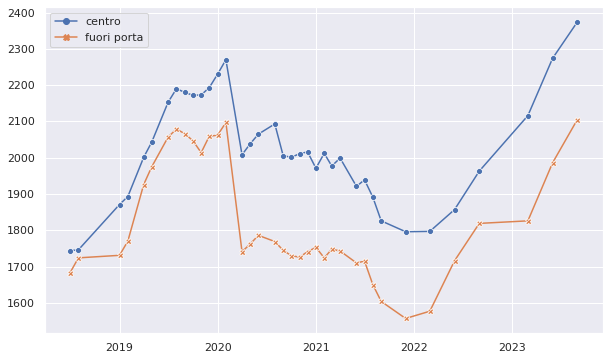

In [11]:
def snsplot(lines):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,6))
    sns.lineplot(markers=True, dashes=False, data=lines)


def ids_during_time(dfs, periods):
    index = pd.DatetimeIndex(periods)

    centro = pd.Series([dfs[i][dfs[i].macroarea.isin(["centro"])]\
                                    .id.count() for i in range(len(dfs))], index=index)
    #bolognina = pd.Series([dfs[i][dfs[i].macroarea.isin(["bolognina"])]\
    #                                .id.count() for i in range(len(dfs))], index=index)
    periferia = pd.Series([dfs[i][dfs[i].macroarea.isin(["periferia"])]\
                                    .id.count() for i in range(len(dfs))], index=index)
    

    lines = centro.rename("centro").to_frame()\
        .join(periferia.rename("fuori porta").to_frame())
            #.join(bolognina.rename("bolognina").to_frame())\
    snsplot(lines)
    
ids_during_time(dfs, periods)

#andamento annunci

In [12]:
# introiti totali, percentuali su Centro, Bolognina.

per = dfs[-1]
introiti_tot = per['price_pond'].sum()
introiti_centro = per[per.macroarea == 'centro']['price_pond'].sum()
introiti_bolognina = per[per.zone == 'Bolognina']['price_pond'].sum()

print(f"introiti totali su Bolo {introiti_tot} €")
print()

print(f"Introiti Bolognina su totale: {(introiti_bolognina/introiti_tot)*100:.2f} %")
print(f"Introiti Centro su totale: {(introiti_centro/introiti_tot)*100:.2f} %")

introiti totali su Bolo 216066.41643835616 €

Introiti Bolognina su totale: 8.82 %
Introiti Centro su totale: 60.05 %
